# Predicting-whether-a-student-will-get-admission

### 1. Problem Statement

The onjective To predict the Chance of Admission 

### Loading Datasets

In [1]:
import pandas as pd
admission=pd.read_csv("C:/Users/Udith P Kidiyoor/Downloads/archive (5)/Admission_Predict.csv")
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [3]:
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
admission.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Count of student per rating

In [5]:
admission["University Rating"].value_counts().sort_index()

University Rating
1     26
2    107
3    133
4     74
5     60
Name: count, dtype: int64

### Group by university rating

In [6]:
admission.groupby("University Rating")["Chance of Admit "].mean()

University Rating
1    0.548077
2    0.625981
3    0.711880
4    0.818108
5    0.888167
Name: Chance of Admit , dtype: float64

In [7]:
admission=admission.drop(columns=["Serial No."])
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
admission=admission.rename(columns={"Chance of Admit ":"Chance of admit"})
admission=admission.rename(columns={"LOR ":"LOR"})

### Visualization

#### Distribition of chance of Admit

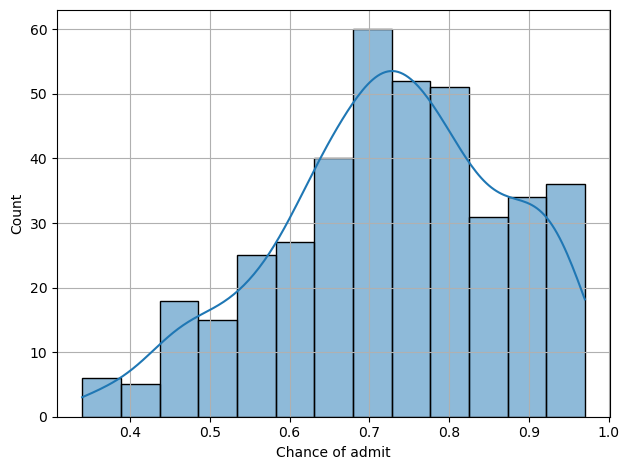

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(admission["Chance of admit"], kde=True)
plt.tight_layout()
plt.grid(True)
plt.show()

### Correlation of Admission Features

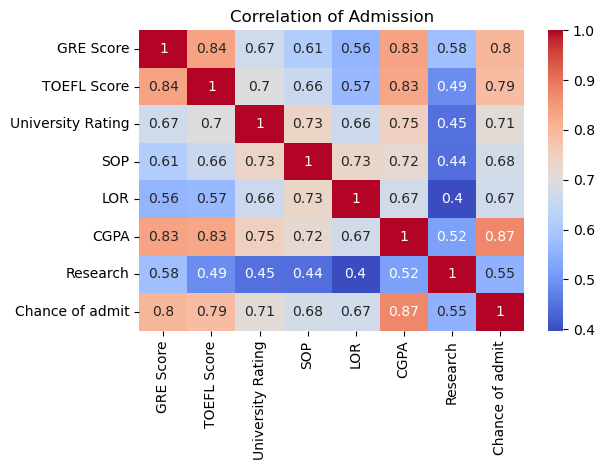

In [10]:
sns.heatmap(admission.corr(),annot=True, cmap="coolwarm")
plt.title('Correlation of Admission')
plt.tight_layout()
plt.show()  

### Scatter plot against target

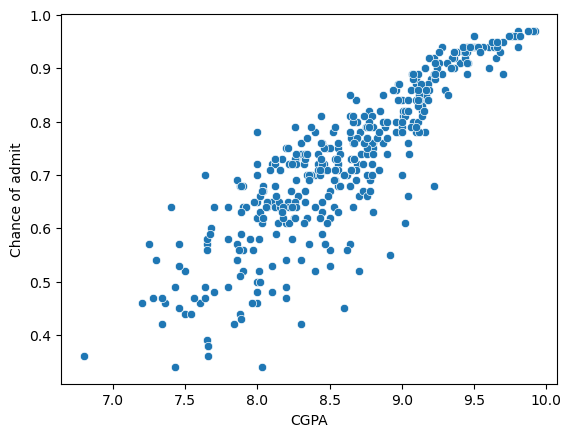

In [11]:
sns.scatterplot(data=admission, x="CGPA", y="Chance of admit")
plt.show()

### Baseline model : Linear regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
X=admission.drop(columns=["Chance of admit"])
y=admission["Chance of admit"]

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 7), (80, 7), (320,), (80,))

In [15]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred=model.predict(X_test)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("Linear Regression R2:", r2)
print("Linear Regression RMSE:", rmse)

Linear Regression R2: 0.8212082591486992
Linear Regression RMSE: 0.06794853476922816


The linear regression model explains over 80% of the variance in admission probability, 
Indicating strong linear relationships between features and the target.

### Advanced Model: Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators=200, random_state=42)
model2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [19]:
y_pred=model2.predict(X_test)

In [20]:
r2_rf=r2_score(y_test, y_pred)
mse_rf=mean_squared_error(y_test, y_pred)
rmse_rf=np.sqrt(mse)
print(r2_rf)
print(rmse_rf)

0.8070310976919512
0.06794853476922816


### Hyperparameter Tuning

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 4, 6, 8],
    "min_samples_leaf": [1, 3, 5],
    "max_features": ["sqrt", "log2"]
}

In [22]:
grid = GridSearchCV(
    estimator=model2,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=200, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [23]:
grid.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'n_estimators': 200}

In [24]:
best_rf = grid.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))

print("Tuned RF R2:", r2_rf_tuned)
print("Tuned RF RMSE:", rmse_rf_tuned)

Tuned RF R2: 0.8132823304727949
Tuned RF RMSE: 0.06943829981979328


Even after tuning, Linear Regression remained the best-performing model.
#### Linear Regression performed better bcause appicant featurer and admission probability are largely linear.

In [25]:
import pandas as pd

importance = pd.Series(
    best_rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance

CGPA                 0.348508
GRE Score            0.267155
TOEFL Score          0.154889
University Rating    0.097700
SOP                  0.060999
LOR                  0.055399
Research             0.015351
dtype: float64

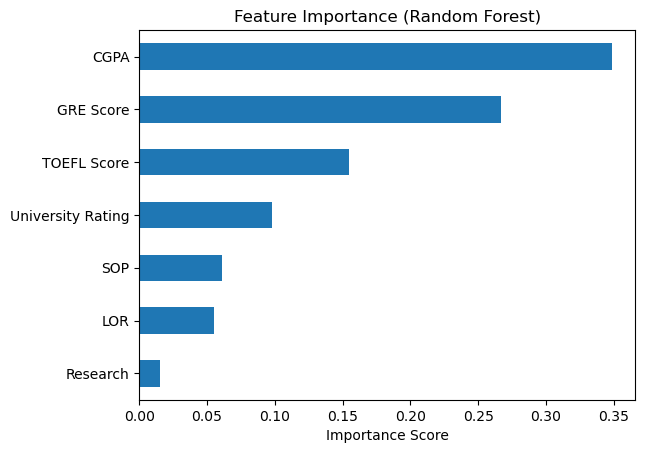

In [26]:
importance.plot(kind="barh")
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [27]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest (Tuned)"],
    "R2": [r2, r2_rf_tuned],
    "RMSE": [rmse, rmse_rf_tuned]
})

results

,Model,R2,RMSE
0,Linear Regression,0.821208,0.067949
1,Random Forest (Tuned),0.813282,0.069438
